# Quickstart Tutorial

This notebooks illustrates the most typical usage of `wakeflow`, where the user wants to find the perturbations induced by some known/hypothesised planet in a disk. In this case, we will model the hypothesised wake induced in the disk of HD 163296 by the embedded protoplanet (see Pinte et al. 2018, Calcino et al. 2022).

## Model Setup and Configuration

To get started, we import the class `WakeflowModel` from `wakeflow`:

In [1]:
from wakeflow import WakeflowModel

If you have `pymcfost` installed, then some warnings about mpl_scatter_density and progress bar may appear. You can safely ignore them.

Next, we instantiate a `WakeflowModel` object and assign it to some variable, that we will call `hd163_model`:

In [2]:
hd163_model = WakeflowModel()

Model initialised.


Now, we wish to choose our model parameters. In all of the Wakeflow documentation this is referred to as "configuring" the model. For our model we want:
\begin{align*}
M_\mathrm{star} &= 1.9 \, \mathrm{M_\odot} \\
M_\mathrm{planet} &= 0.5 \, \mathrm{M_{Jupiter}} \\
R_\mathrm{outer} &= 500 \, \mathrm{AU} \\
R_\mathrm{planet} &= 256 \, \mathrm{AU} \\
R_\mathrm{ref} &= 256 \, \mathrm{AU} \\
q &= 0.35 \\
p &= 2.15 \\
\frac{H}{R}(R_\mathrm{ref}) &= 0.09 \\
\mathrm{cw_{rotation}} &= \mathrm{False} \\
\mathrm{grid \, type} &= \mathrm{cartesian} \\
n_x &= 600 \\
n_y &= 600 \\
n_z &= 30.
\end{align*}

These models specify the system, disk and planet parameters, as well as the grid geometry. $M_\mathrm{star}$ is the central star mass, $M_\mathrm{planet}$ is the mass of the perturbing planet, $R_\mathrm{outer}$ is the outermost disk radius where `wakeflow` will model the system to, $R_\mathrm{planet}$ is the planet orbital radius. The other disk quantites are defined in the following way, satisfying vertical hydrostatic equilibrium in the gas disk

\begin{align*}
\rho(R,z) &= \rho(R_\mathrm{ref}) \left( \frac{R}{R_\mathrm{ref}} \right)^{-p} \exp{\left( \frac{G M_\mathrm{star}}{c_s^2} \left[ \frac{1}{\sqrt{R^2 - z^2}} - \frac{1}{R}  \right]\right)} \\
c_s(R,z) &= c_s(R_\mathrm{ref}) \left( \frac{R}{R_\mathrm{ref}} \right)^{-q} \\
\frac{H}{R}(R,z) &= \frac{c_s}{R \Omega_\mathrm{K}} = \frac{H}{R} (R_\mathrm{ref}) \left( \frac{R}{R_\mathrm{ref}} \right)^{0.5-q},
\end{align*}

where $\rho$ is density, $c_s$ is the sound speed and $\Omega_K$ is Keplerian rotation. $\rho(R_\mathrm{ref})$ in `wakeflow` is set by default to $1$, while $c_s(R_\mathrm{ref})$ is fixed by your choice of $\frac{H}{R} (R_\mathrm{ref})$. In our case we have defined all of our quantites at the planet radius $R=R_\mathrm{planet}$ and so $R_\mathrm{ref}=R_\mathrm{planet}$. 

We have also specified $\mathrm{cw_{rotation}} = \mathrm{False}$, ie. we want our disk to rotate anticlockwise. Finally, we have chosen to get our results on a Cartesian grid with 600 points in the $x$-direction, 600 points in the $y$-direction and 30 points in the $z$-direction. For all other possible `wakeflow` parameters we will use the defaults. A full list of every `wakeflow` parameter, an explanation of said parameter, and its default value is available under the _Reference_ section in the documentation.

To actually give these parameters to `wakeflow`, we use the `configure` method on our `WakeflowModel` object:

In [3]:
hd163_model.configure(
    name        = "quickstart_tutorial",
    system      = "HD_163296",
    m_star      = 1.9,
    m_planet    = 0.5,
    r_outer     = 500,
    r_planet    = 256,
    r_ref       = 256,
    q           = 0.35,
    p           = 2.15,
    hr          = 0.09,
    cw_rotation = False,
    grid_type   = "cartesian",
    n_x         = 600,
    n_y         = 600,
    n_z         = 30
)

Model configured.


Note that we have specified two previously unmentioned parameters, `name` and `system`. These dictate where your results will be saved relative to the current directory. `system` will be the parent directory and `name` will be where the results from this model are stored: `working_dir/system/name/your_results_here`. You may also give `configure` a list of values for `m_planet` instead of a single value to generate models with multiple planet masses but the same disk parameters. In this case the results of these are saved in separate folders inside the `name` directory.

## Running the Model

Now, we simply run the model using the `run` method.

`wakeflow` will first check that the combination of parameters given is sensical. If there is an issue it will either abort or provide a warning to the user depending on the severity.


* Performing checks on model parameters:
M_thermal = 0.967 M_Jup
M_planet  = 0.517 M_th
Parameters Ok - continuing

* Creating 0.5 Mj model:
Generating unperturbed background disk
Extracting linear perturbations nearby planet
Propagating outer wake... 
Completed in 1.44 s
Propagating inner wake... 
Completed in 1.45 s



* Mapping to physical coords: 100%|██████████| 600/600 [00:48<00:00, 12.49it/s]



* Displaying results:


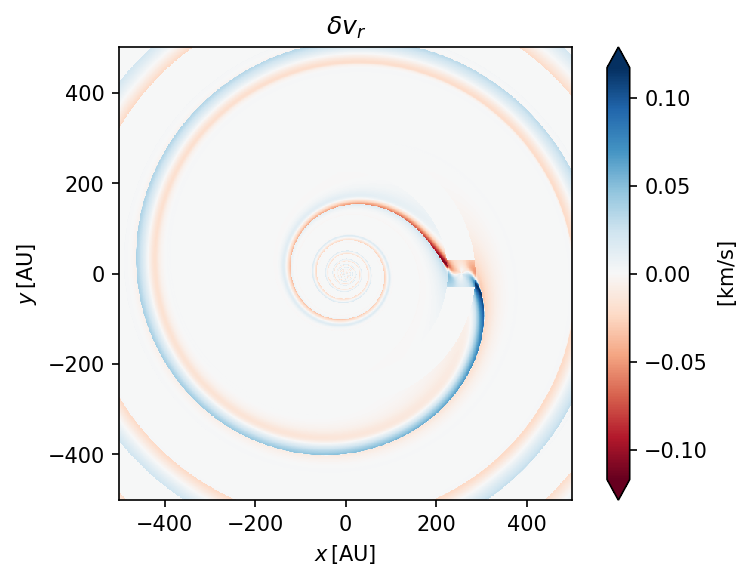

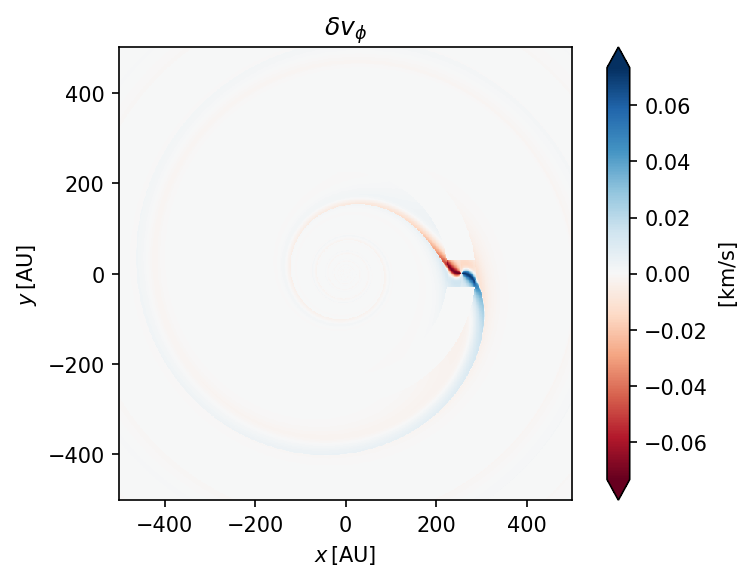

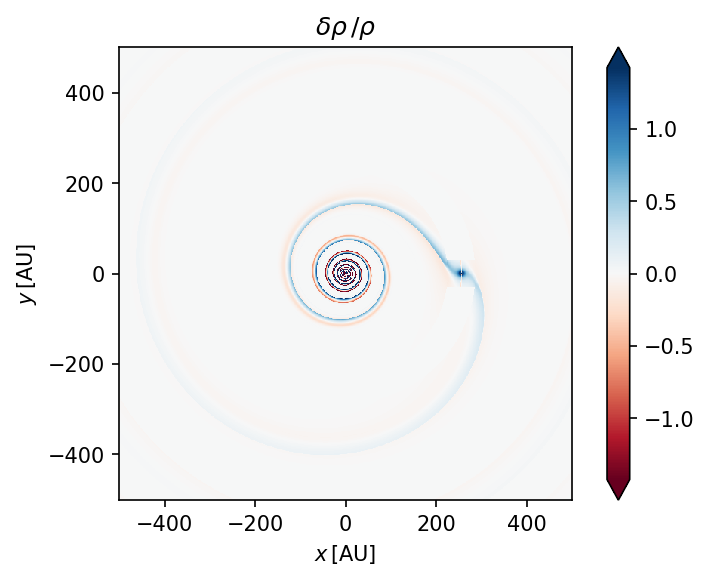


* Saving results:
Perturbations saved to HD_163296/quickstart_tutorial/0.5Mj
Total         saved to HD_163296/quickstart_tutorial/0.5Mj

* Done!


In [4]:
hd163_model.run()

Success! We have successfully created our first model, and we can see plots of the generated perturbations above! `wakeflow` has also provided us with a message about where our results have been saved.

NOTE: If results already exist for the `system` and `name` given, the `run` method will return an `Exception`. You can override this behaviour and simply overwrite the old results by giving `run` the optional argument `overwrite=True`.

## Results Format

Lets check that our results are really there:

In [5]:
!ls HD_163296/quickstart_tutorial

0.5Mj                           quickstart_tutorial_config.yaml


We can see that there is a directory called `0.5Mj`, and a `.yaml` file in the results directory. Lets check that the former contains our model results:

In [6]:
!ls HD_163296/quickstart_tutorial/0.5Mj

X.npy           delta_rho.npy   rho_z0.pdf      total_v_r.npy
Y.npy           delta_v_phi.npy total_rho.npy   vphi_z0.pdf
Z.npy           delta_v_r.npy   total_v_phi.npy vr_z0.pdf


And indeed it does! The results are stored as .npy files so that they aren't very large. The `X.npy`, `Y.npy` and `Z.npy` files are the 3D grid of the results, specifying the x, y and z points on the grid respectively. The `delta_rho.npy`, `delta_v_r.npy` and `delta_rho.npy` files are the density, radial velocity and azimuthal velocity perturbations respectively. The `total_rho.npy`, `total_v_r.npy` and `total_rho.npy`are the total values of the same quantites, ie. the unperturbed background disk plus the perturbations.

Note that each of the `.npy` files contain a single, 3D `numpy` array. This array has dimensions ($n_x$, $n_z$, $n_y$) for Cartesian grid geometry, and dimensions ($n_\phi$, $n_z$, $n_r$) for Cylindrical grid geometry.

The `.pdf` files are the same plots that the `run` method showed upon completion, which are the perturbations in the disk mid-plane at $z=0$.

Finally, we note that `wakeflow` also generated a `.yaml` file in the results directory:

In [7]:
!cat HD_163296/quickstart_tutorial/quickstart_tutorial_config.yaml

CFL: 0.5
PA: 45
PAp: 45
adiabatic_index: 1.6666667
box_warp: true
cw_rotation: false
damping_malpha: 0.0
dens_ref: 1.0
dimensionless: false
distance: 101.5
grid_type: cartesian
hr: 0.09
inclination: -225
include_linear: true
include_planet: true
m_planet: 0.5
m_star: 1.9
make_midplane_plots: true
n_phi: 160
n_r: 200
n_v: 40
n_x: 600
n_y: 600
n_z: 30
name: quickstart_tutorial
p: 2.15
q: 0.35
r_c: 0
r_inner: 100
r_log: false
r_outer: 500
r_planet: 256
r_ref: 256
run_mcfost: false
save_perturbations: true
save_total: true
scale_box: 1.0
scale_box_ang: 1.0
show_midplane_plots: true
show_teta_debug_plots: false
system: HD_163296
temp_star: 9250
tf_fac: 1.0
use_box_IC: false
v_max: 3.2
write_FITS: false


This `.yaml` file contains ALL of the parameters used in our model, including those we did not specify and were left as default values. It is provided so that you can easily reproduce your results in the event that you lose your run script. It is also possible for `wakeflow` to be configured straight from such `.yaml` files instead of using the `configure` method. This is outlined in the _Advanced Configuration_ tutorial.

## Reading Results and Visualisation

Reading and plotting the results from a wakeflow model is as simple as reading the `.npy` files using `numpy`, and then understanding the grid dimensions so that you can plot what you want. As an example, we show here reading and plotting the total density at multiple heights in the disk.

Firstly, we will need `numpy` and `matplotlib.pyplot` so lets import those:

In [8]:
import numpy                as np
import matplotlib.pyplot    as plt

Now we can read in the $x$, $y$ and $z$ points:

In [9]:
# 1 Mj planet results directory
results = "HD_163296/quickstart_tutorial/0.5Mj"

# load arrays
X = np.load(f"{results}/X.npy")
Y = np.load(f"{results}/Y.npy")
Z = np.load(f"{results}/Z.npy")

And we can read in the total density

In [10]:
rho = np.load(f"{results}/total_rho.npy")

Lets check that the shape of our arrays is what we expect. Remember, they should be ($n_x$, $n_z$, $n_y$), which for us is (600, 30, 600).

In [11]:
print(X.shape, Y.shape, Z.shape)
print(rho.shape)

(600, 30, 600) (600, 30, 600) (600, 30, 600)
(600, 30, 600)


We can extract the x, y and z values of the grid into 1D arrays by slicing appropriately:

In [12]:
x = X[:,0,0]
y = Y[0,0,:]
z = Z[0,:,0]

# check we get what we expect for minimum and maximum values
print(f"x_min = {x.min()}, x_max = {x.max()}")
print(f"y_min = {y.min()}, y_max = {y.max()}")
print(f"z_min = {z.min()}, z_max = {z.max()}")

x_min = -500.0, x_max = 500.0
y_min = -500.0, y_max = 500.0
z_min = 0.0, z_max = 49.753314667208734


Note that the maximum $z$ value is chosen by `wakeflow` to be the scale height $H=c_s/\Omega_\mathrm{K}$ at $R_\mathrm{outer}$.

We can now plot the density, for instance at $z=10 \, \mathrm{AU}$. First we need to find the index to slice the array where $z$ is closest to $10$:

In [13]:
ind_10au = np.argmin(z < 10)
print(ind_10au)

6


And now plotting:

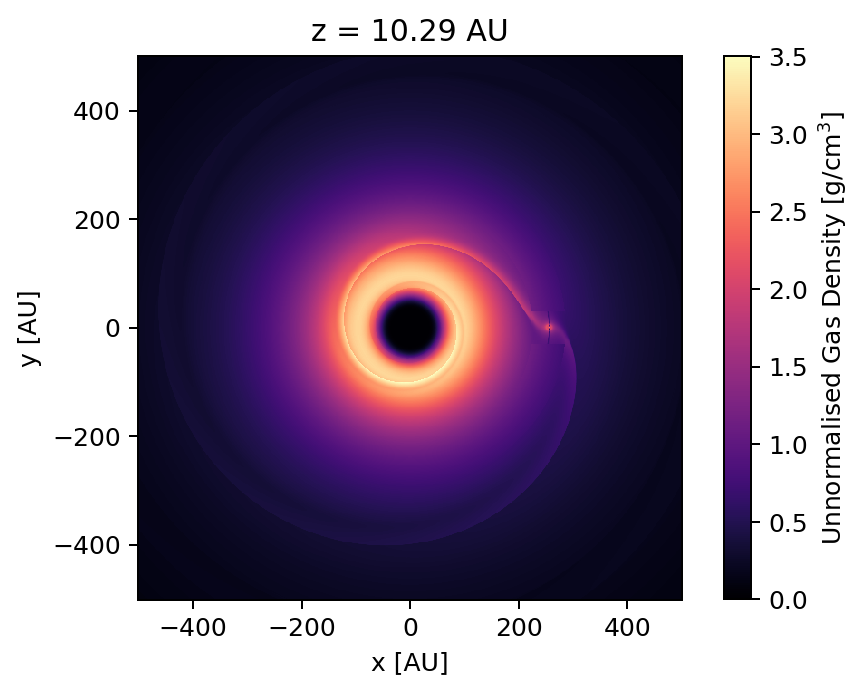

In [14]:
fig, ax = plt.subplots(dpi=180)
c = ax.pcolormesh(x, y, rho[:,ind_10au,:].transpose(), cmap="magma")
ax.axis("scaled")
ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title(f"z = {round(z[ind_10au], 2)} AU")
plt.colorbar(c, label="Unnormalised Gas Density [$\mathrm{g/cm^3}$]")
plt.show()

NOTE: In the above plot we needed to use the _transpose_ of the `rho` array. This might seem weird because after slicing it should have dimensions ($n_x$, $n_y$). This is simply because `matplotlib` expects a column-row format typical of matrices and images, and we are giving row-column. We are NOT transforming the data by performing the transpose.

This concludes the current tutorial. 

The _Advanced Configuration_ tutorial covers how to configure `wakeflow` models using `.yaml` files and dictionaries, and how to use this to easily perform parameter space scans. The tutorial also covers how to change advanced/developer parameters.

The _Using Wakeflow with MCFOST_ tutorial covers how to generate models that can be fed into the radiative transfer code `MCFOST` in order to generate synthetic observations.

Under the _Reference_ sections of the documentation, the _Wakeflow Parameters_ section provides a detailed explanation of ALL `wakeflow` parameters, and the _Disk Structure_ section provides an explanation of the unperturbed disk model used by `wakeflow` including how to use an exponentially tapered density profile.